In [1]:
import os
import json
import datetime

from environment import GeneralizedOvercooked
from agent import MAPPO
from utils import plot_training_results, evaluate_agent_on_layouts, convert_np

def train_and_evaluate_MAPPO(
    env = GeneralizedOvercooked(layouts=["cramped_room","asymmetric_advantages","forced_coordination","coordination_ring"]),
    layouts = ["cramped_room", "asymmetric_advantages", "forced_coordination", "coordination_ring"],
    run_name="default",
    max_timesteps=1_200_000,
    plot_window=50,
    **mappo_kwargs  
    ):
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    run_save_dir = os.path.join("models", f"{run_name}_{timestamp}")
    os.makedirs(run_save_dir, exist_ok=True)

    policy_path = os.path.join(run_save_dir, "policy_net.keras")

    mappo = MAPPO(env, max_timesteps=max_timesteps, **mappo_kwargs)

    training_stats = mappo.train(save_dir=run_save_dir)

    plot_training_results(training_stats, window_size=plot_window)

    stats_path = os.path.join(run_save_dir, f"training_stats_{run_name}_{timestamp}.json")
    with open(stats_path, "w") as f:
        json.dump(convert_np(training_stats), f)

    print(f"Training completed. Models saved to {run_save_dir}. Starting evaluation...")

    evaluate_agent_on_layouts(
        layouts=layouts,
        policy_path=policy_path,
        num_episodes=10,
        deterministic=False
    )

    return 

TOTAL_TIMESTEPS = 1_200_000

multi_env = GeneralizedOvercooked(layouts=["cramped_room", "asymmetric_advantages", "forced_coordination", "coordination_ring"])
layouts = ["cramped_room", "asymmetric_advantages", "forced_coordination", "coordination_ring"]


d:\Python\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists
d:\Python\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\Python\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  wa

### Testing usefulness of linear decay 
- half run vs full run means when the shaping coefficient will go to zero


Training Progress:  50%|████▉     | 596000/1200000 [54:06<51:27, 195.65it/s, Step=596000, AvgR(10)=24.91, pi_loss=-0.05, v_loss=0.71]  

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:47:57<00:00, 185.25it/s, Step=1.2e+6, AvgR(10)=288.00, pi_loss=-0.06, v_loss=19.32] 


Models saved to models\full_run_final_20250822_093909


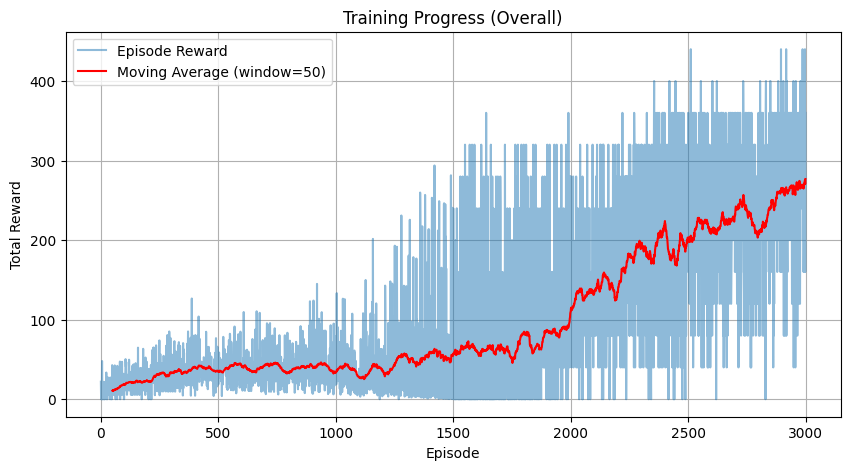

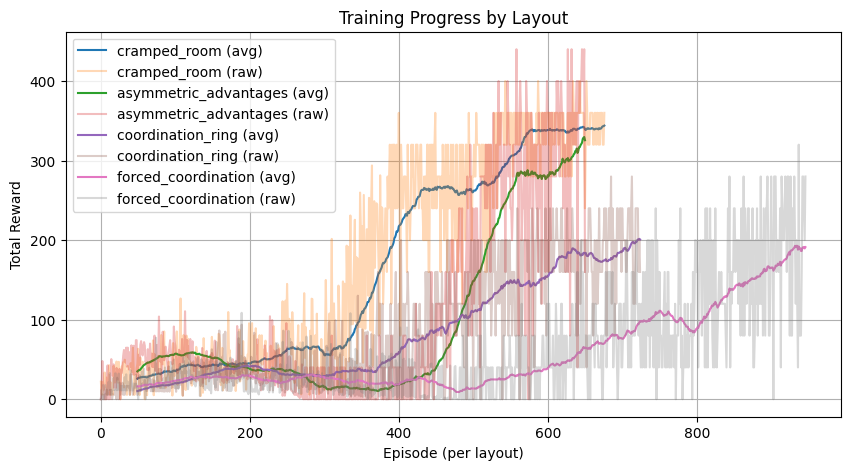

Training completed. Models saved to models\full_run_final_20250822_093909. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 164.00 +/- 14.97
asymmetric_advantages: 206.00 +/- 20.10
forced_coordination: 70.00 +/- 33.76
coordination_ring: 98.00 +/- 24.41


In [ ]:
train_and_evaluate_MAPPO(
    env=multi_env,
    layouts=layouts,
    run_name=f"full_run_final",
    max_timesteps=TOTAL_TIMESTEPS,
    decay_until="half_run"
    )

### Doubling the net dimension

Training Progress: 100%|██████████| 1200000/1200000 [1:49:13<00:00, 183.12it/s, Step=1.2e+6, AvgR(10)=240.71, pi_loss=-0.02, v_loss=8.12]  


Models saved to models\full_run_20250822_122612


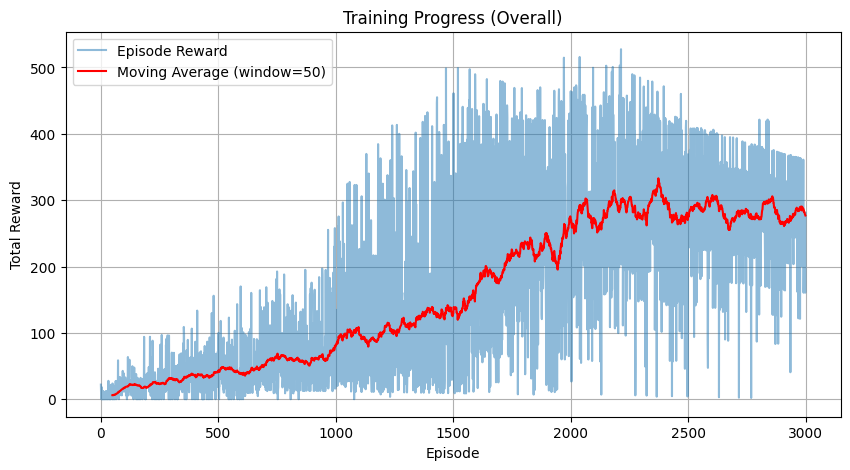

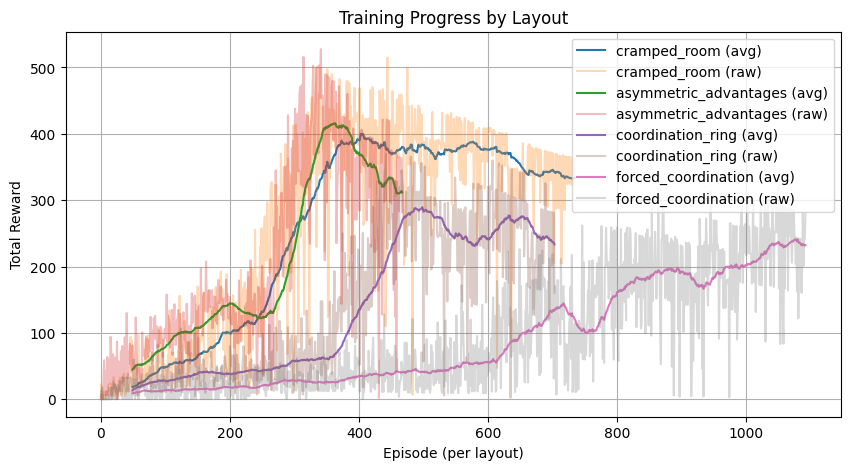

Training completed. Models saved to models\full_run_20250822_122612. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 160.00 +/- 15.49
asymmetric_advantages: 156.00 +/- 19.60
forced_coordination: 100.00 +/- 28.28
coordination_ring: 130.00 +/- 16.12


In [ ]:
train_and_evaluate_MAPPO(
    env=multi_env,
    layouts=layouts,
    run_name=f"full_run",
    max_timesteps=TOTAL_TIMESTEPS,
    dense_units=256,
    decay_until="full_run"
    )

Training Progress: 100%|██████████| 1200000/1200000 [1:49:18<00:00, 182.98it/s, Step=1.2e+6, AvgR(10)=256.83, pi_loss=0.14, v_loss=34.50]  


Models saved to models\full_run_20250822_141636


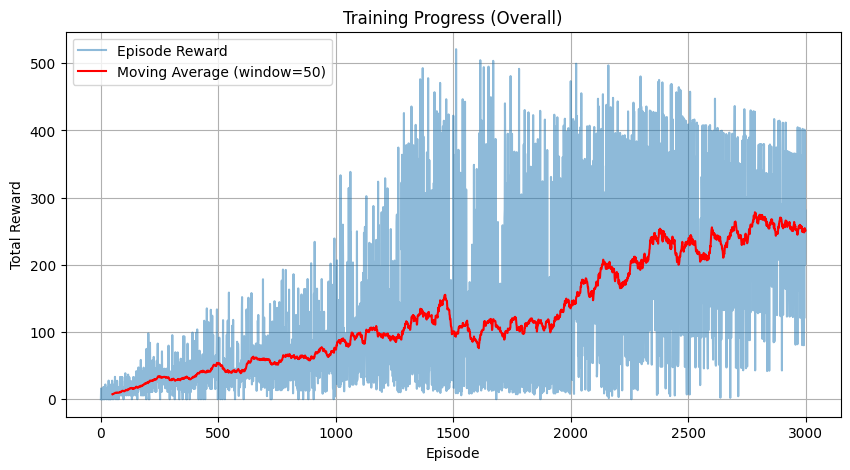

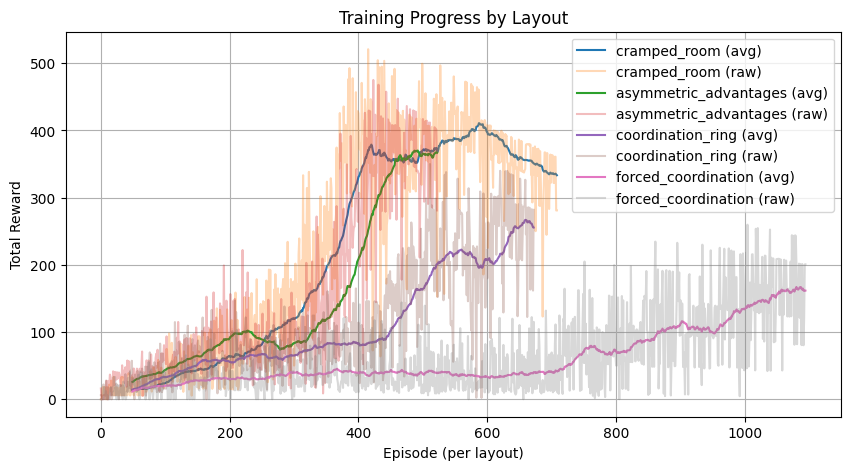

Training completed. Models saved to models\full_run_20250822_141636. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 170.00 +/- 10.00
asymmetric_advantages: 174.00 +/- 15.62
forced_coordination: 72.00 +/- 41.18
coordination_ring: 114.00 +/- 29.73


In [ ]:
train_and_evaluate_MAPPO(
    env=multi_env,
    layouts=layouts,
    run_name=f"full_run",
    max_timesteps=TOTAL_TIMESTEPS,
    dense_units=128, #half the neurons
    decay_until="full_run"
    )

### No decay

Training Progress: 100%|██████████| 1200000/1200000 [1:50:19<00:00, 181.29it/s, Step=1.2e+6, AvgR(10)=540.20, pi_loss=-0.02, v_loss=40.00] 


Models saved to models\full_run_20250822_162302


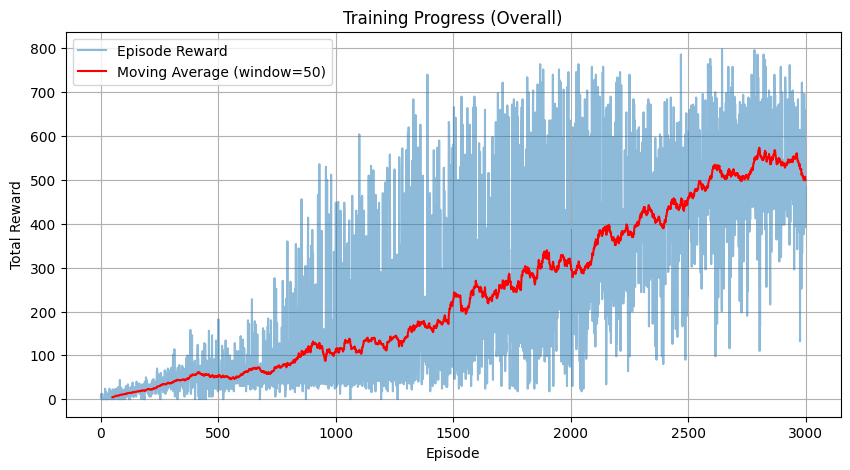

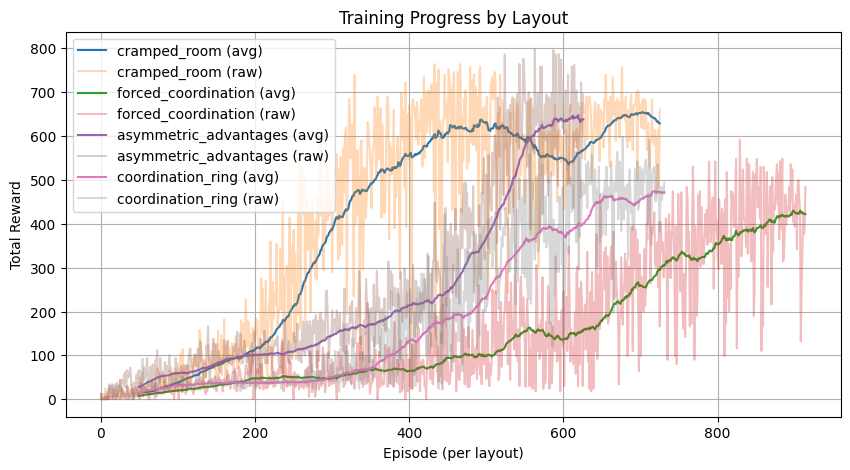

Training completed. Models saved to models\full_run_20250822_162302. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 164.00 +/- 17.44
asymmetric_advantages: 148.00 +/- 20.40
forced_coordination: 108.00 +/- 28.57
coordination_ring: 130.00 +/- 13.42


In [ ]:
train_and_evaluate_MAPPO(
    env=multi_env,
    layouts=layouts,
    run_name=f"full_run",
    max_timesteps=TOTAL_TIMESTEPS,
    dense_units=256,
    shaping_decay=0
    )

## Buffer dimension

Training Progress:  50%|█████     | 600000/1200000 [47:24<47:26, 210.76it/s, Step=6e+5, AvgR(5)=72.34, pi_loss=-0.05, v_loss=1.50]    

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:34:45<00:00, 211.06it/s, Step=1.2e+6, AvgR(5)=64.00, pi_loss=-0.03, v_loss=3.39]  


Models saved to models\buf2000_20250822_185256


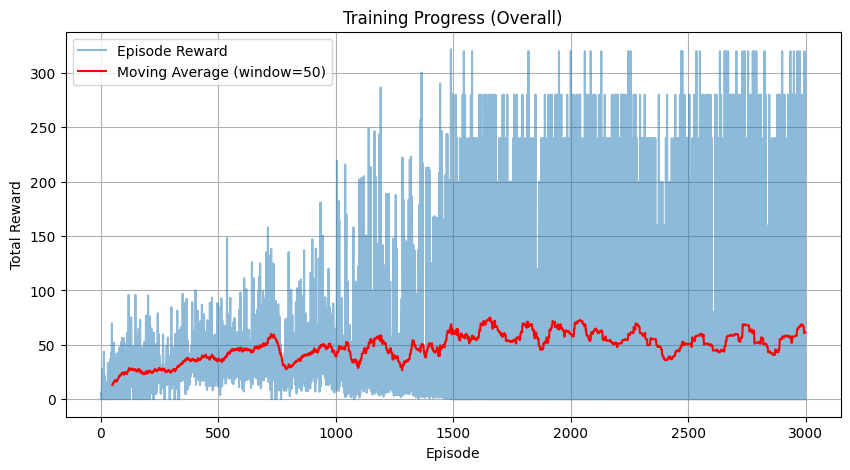

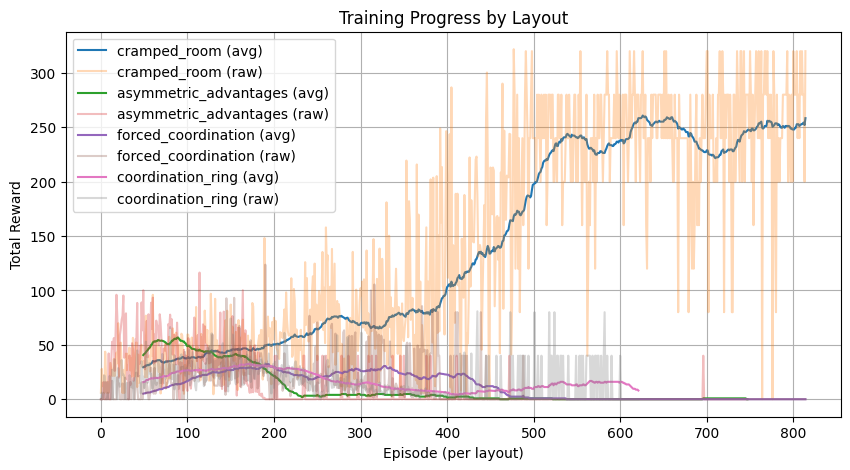

Training completed. Models saved to models\buf2000_20250822_185256. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 144.00 +/- 14.97
asymmetric_advantages: 0.00 +/- 0.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 0.00 +/- 0.00


Training Progress:  50%|█████     | 600000/1200000 [49:34<48:28, 206.32it/s, Step=6e+5, AvgR(20)=33.33, pi_loss=0.07, v_loss=1.60]     

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:38:00<00:00, 204.06it/s, Step=1.2e+6, AvgR(20)=224.00, pi_loss=-0.02, v_loss=17.18] 

Models saved to models\buf8000_20250822_202819


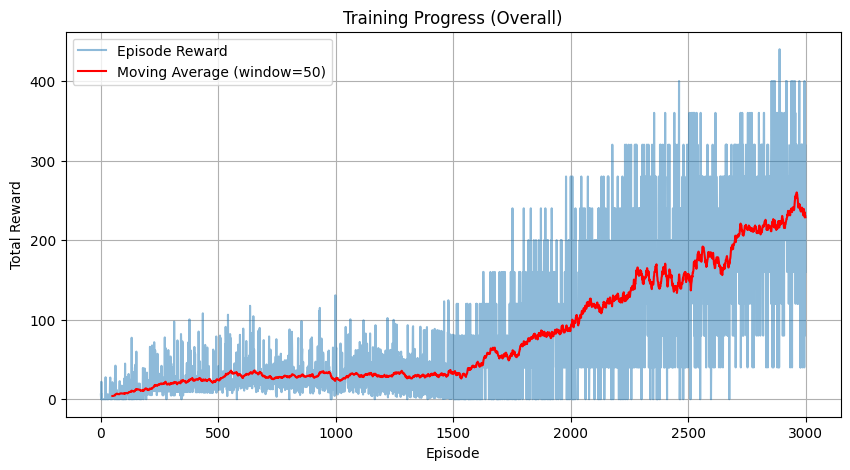

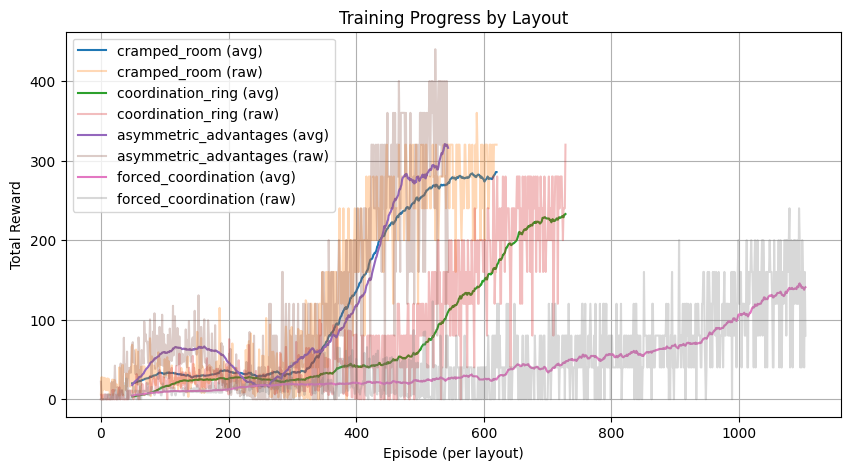

Training completed. Models saved to models\buf8000_20250822_202819. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 162.00 +/- 6.00
asymmetric_advantages: 178.00 +/- 20.88
forced_coordination: 58.00 +/- 24.41
coordination_ring: 126.00 +/- 12.81


In [38]:
for buf_size in [2000,8000]:
    train_and_evaluate_MAPPO(
        env=multi_env,
        layouts=layouts,
        max_timesteps=TOTAL_TIMESTEPS,
        run_name=f"buf{buf_size}",
        buffer_size=buf_size
    )

## Batch size

Training Progress: 100%|██████████| 1600000/1600000 [2:20:21<00:00, 189.98it/s, Step=1.6e+6, AvgR(10)=486.65, pi_loss=0.04, v_loss=78.68]   


Models saved to models\bs128_20250820_200006


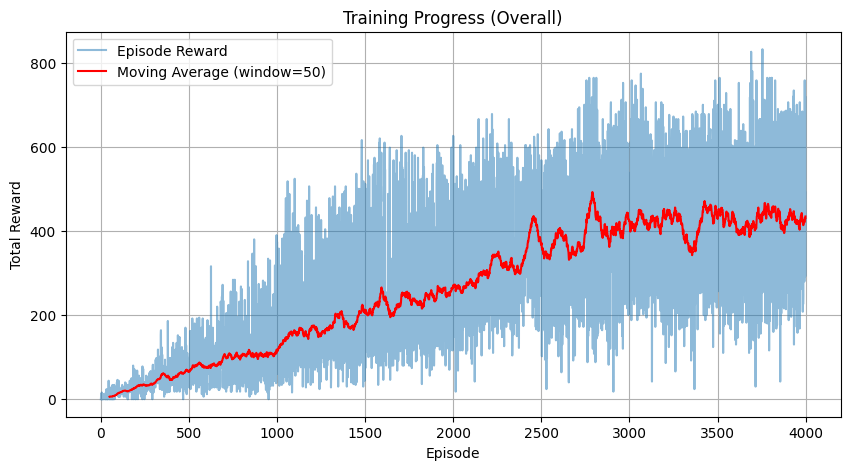

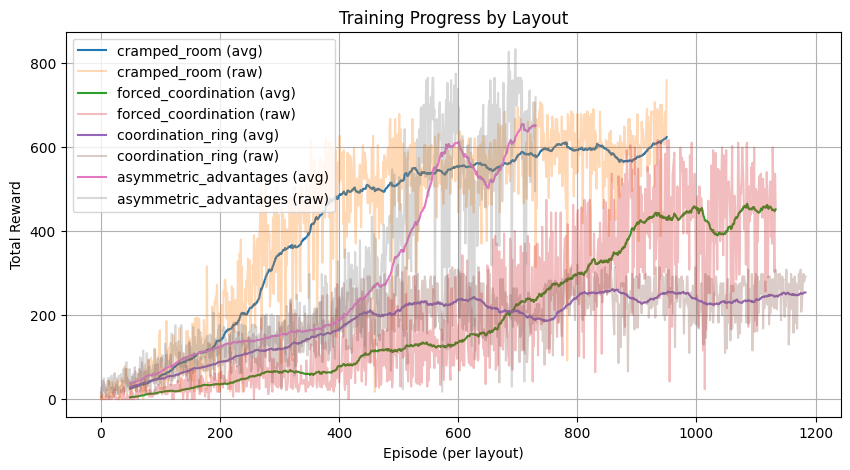

Training completed. Models saved to models\bs128_20250820_200006. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 174.00 +/- 9.17
asymmetric_advantages: 170.00 +/- 24.08
forced_coordination: 96.00 +/- 29.39
coordination_ring: 0.00 +/- 0.00


Training Progress: 100%|██████████| 1600000/1600000 [1:50:21<00:00, 241.64it/s, Step=1.6e+6, AvgR(10)=641.45, pi_loss=0.01, v_loss=75.83]  


Models saved to models\bs512_20250820_222104


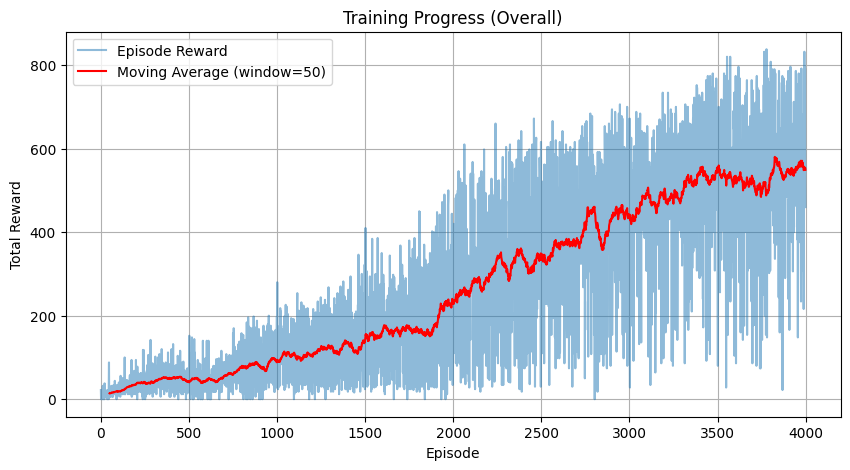

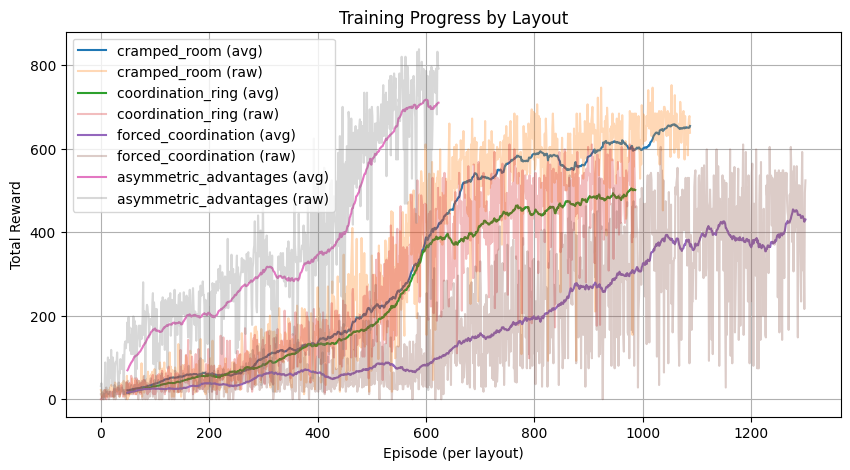

Training completed. Models saved to models\bs512_20250820_222104. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 172.00 +/- 9.80
asymmetric_advantages: 192.00 +/- 36.00
forced_coordination: 126.00 +/- 15.62
coordination_ring: 122.00 +/- 30.27


In [ ]:
for bs in [128,512]:
    train_and_evaluate_MAPPO(
        env=multi_env,
        layouts=layouts,
        max_timesteps=TOTAL_TIMESTEPS,
        run_name=f"bs{bs}",
        batch_size=bs
    )

## Epochs

Training Progress:  50%|████▉     | 596000/1200000 [44:37<45:17, 222.22it/s, Step=596000, AvgR(10)=12.66, pi_loss=-0.10, v_loss=0.46]  

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:32:24<00:00, 216.44it/s, Step=1.2e+6, AvgR(10)=52.00, pi_loss=0.00, v_loss=4.64]  

Models saved to models\epoch4_20250822_221034


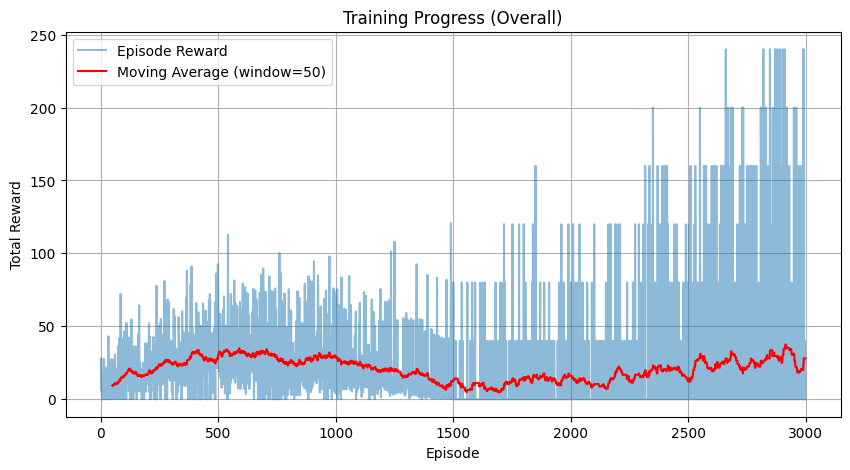

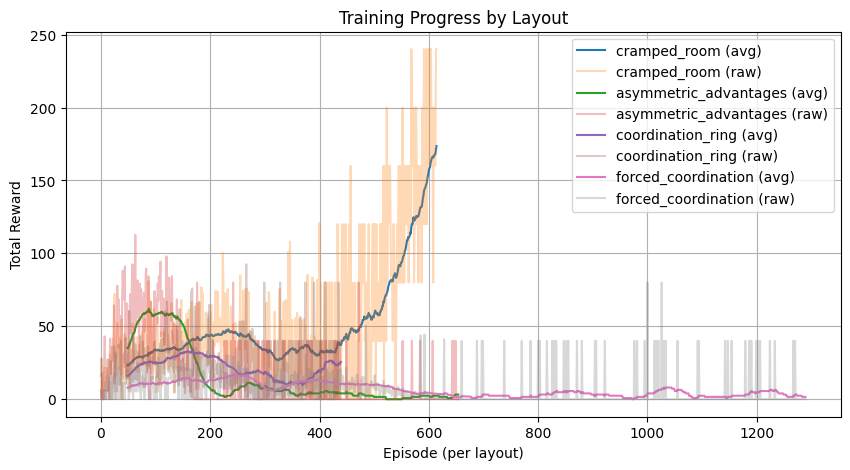

Training completed. Models saved to models\epoch4_20250822_221034. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 104.00 +/- 14.97
asymmetric_advantages: 4.00 +/- 8.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 6.00 +/- 9.17


Training Progress:  50%|████▉     | 596000/1200000 [51:10<51:39, 194.84it/s, Step=596000, AvgR(10)=24.96, pi_loss=-0.07, v_loss=0.76]  

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:41:59<00:00, 196.08it/s, Step=1.2e+6, AvgR(10)=16.00, pi_loss=0.08, v_loss=0.49]  


Models saved to models\epoch10_20250822_234335


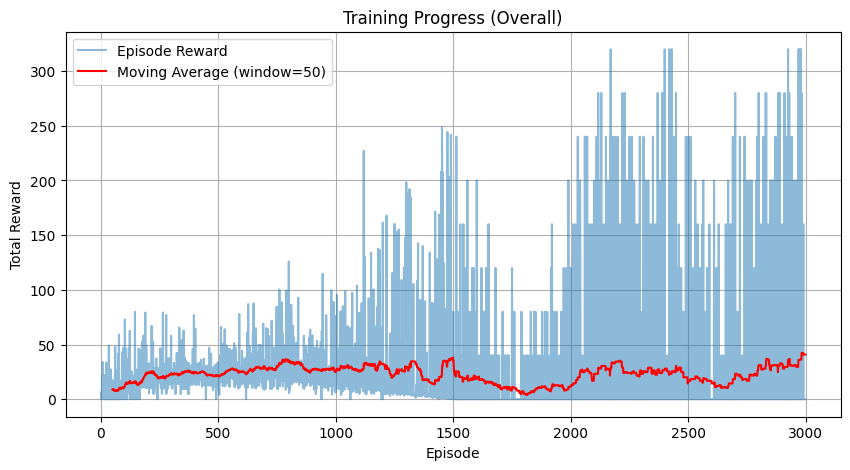

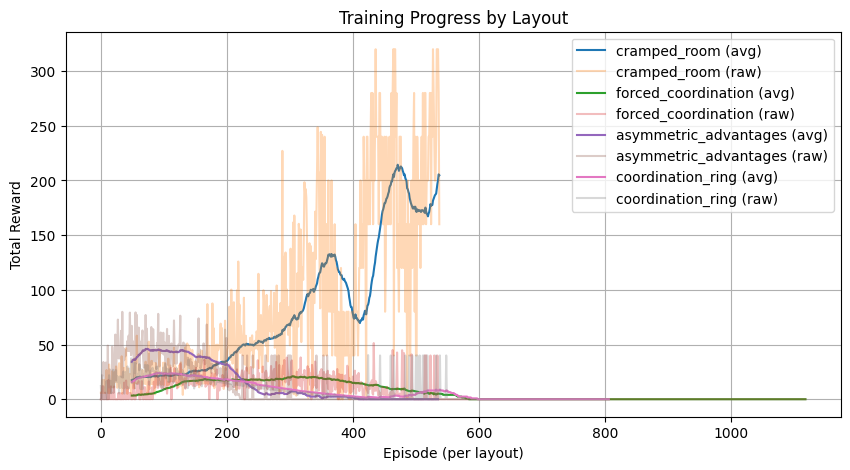

Training completed. Models saved to models\epoch10_20250822_234335. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 146.00 +/- 22.00
asymmetric_advantages: 0.00 +/- 0.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 0.00 +/- 0.00


In [40]:
for epoch in [4,10]:
    train_and_evaluate_MAPPO(
        env=multi_env,
        layouts=layouts,
        max_timesteps=TOTAL_TIMESTEPS,
        run_name=f"epoch{epoch}",
        epochs=epoch
    )

## Clip ratio

Training Progress:  50%|████▉     | 596000/1200000 [46:17<46:52, 214.73it/s, Step=596000, AvgR(10)=37.01, pi_loss=-0.19, v_loss=0.23]  

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:33:42<00:00, 213.41it/s, Step=1.2e+6, AvgR(10)=28.00, pi_loss=0.16, v_loss=5.22]  


Models saved to models\clip0.1_20250823_012612


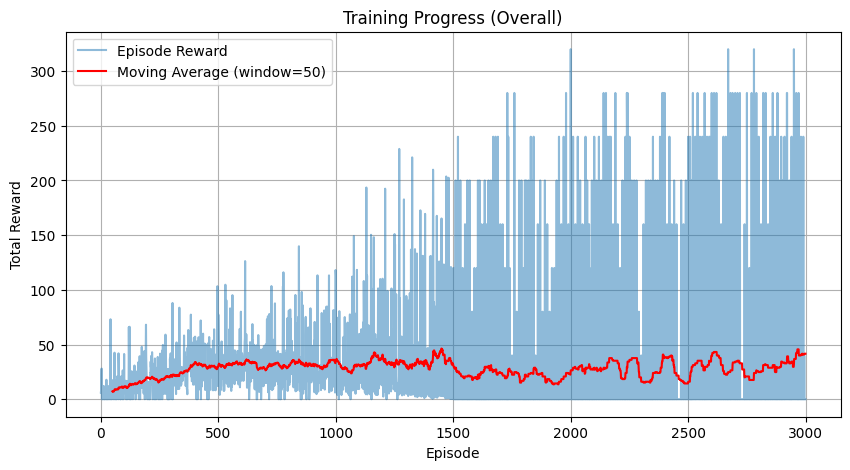

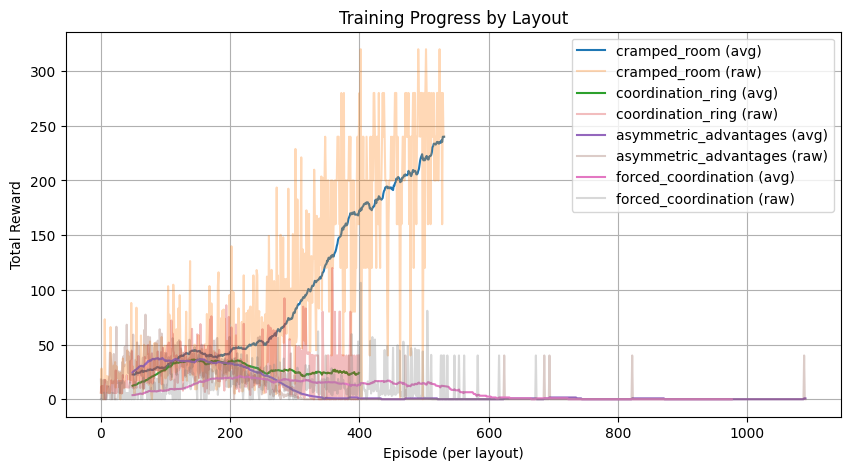

Training completed. Models saved to models\clip0.1_20250823_012612. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 114.00 +/- 29.73
asymmetric_advantages: 0.00 +/- 0.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 10.00 +/- 10.00


Training Progress:  50%|████▉     | 596000/1200000 [46:22<46:42, 215.56it/s, Step=596000, AvgR(10)=48.96, pi_loss=0.06, v_loss=2.30]   

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:33:09<00:00, 214.71it/s, Step=1.2e+6, AvgR(10)=204.00, pi_loss=-0.04, v_loss=7.25]  

Models saved to models\clip0.3_20250823_030032


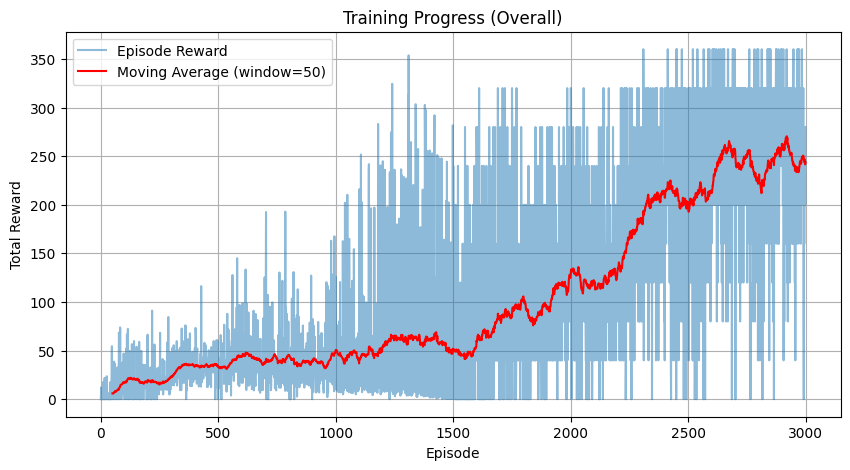

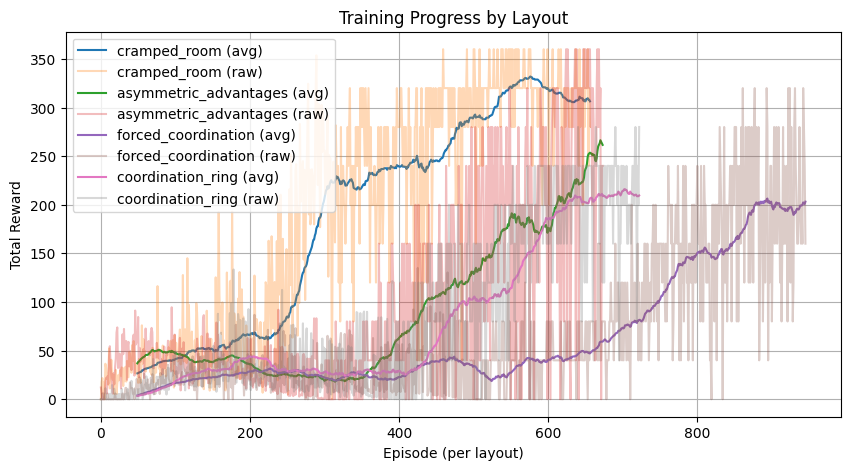

Training completed. Models saved to models\clip0.3_20250823_030032. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 150.00 +/- 28.64
asymmetric_advantages: 144.00 +/- 19.60
forced_coordination: 124.00 +/- 19.60
coordination_ring: 110.00 +/- 20.49


In [41]:
for clip_ratio in [0.1,0.3]:
    train_and_evaluate_MAPPO(
        env=multi_env,
        layouts=layouts,
        max_timesteps=TOTAL_TIMESTEPS,
        run_name=f"clip{clip_ratio}",
        clip_ratio=clip_ratio
    )

## GAE lambda

Training Progress:  50%|████▉     | 596000/1200000 [49:17<52:14, 192.67it/s, Step=596000, AvgR(10)=0.60, pi_loss=0.06, v_loss=0.02]    

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:38:50<00:00, 202.34it/s, Step=1.2e+6, AvgR(10)=0.00, pi_loss=-0.06, v_loss=0.00] 


Models saved to models\lam0.99_20250823_105924


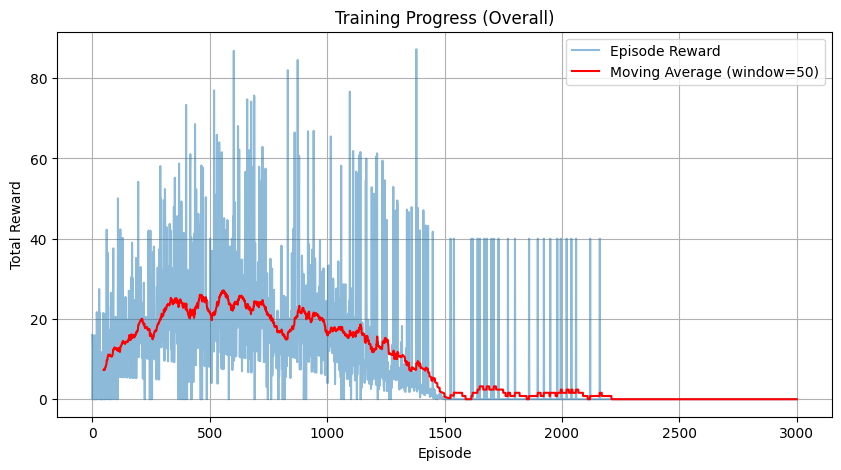

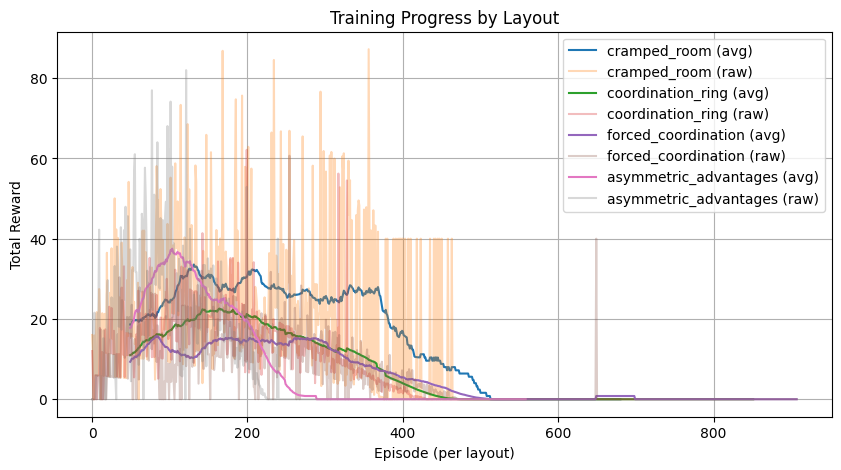

Training completed. Models saved to models\lam0.99_20250823_105924. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 0.00 +/- 0.00
asymmetric_advantages: 0.00 +/- 0.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 0.00 +/- 0.00


In [48]:
for lam in [0.99]:
    train_and_evaluate_MAPPO(
        env=multi_env,
        layouts=layouts,
        max_timesteps=TOTAL_TIMESTEPS,
        run_name=f"lam{lam}",
        lam=lam
    )

## Relu activation

Training Progress:  50%|████▉     | 596000/1200000 [49:16<48:25, 207.85it/s, Step=596000, AvgR(10)=49.53, pi_loss=-0.09, v_loss=2.73]  

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:38:17<00:00, 203.46it/s, Step=1.2e+6, AvgR(10)=304.00, pi_loss=-0.12, v_loss=15.45] 


Models saved to models\activationrelu_20250823_091958


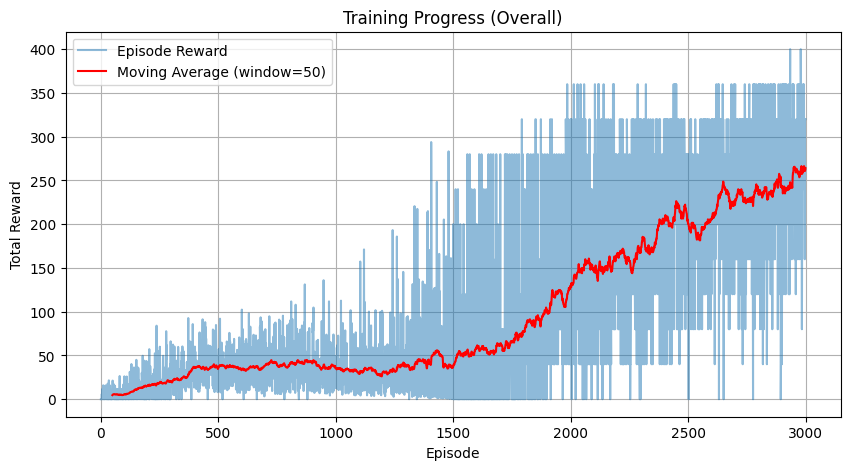

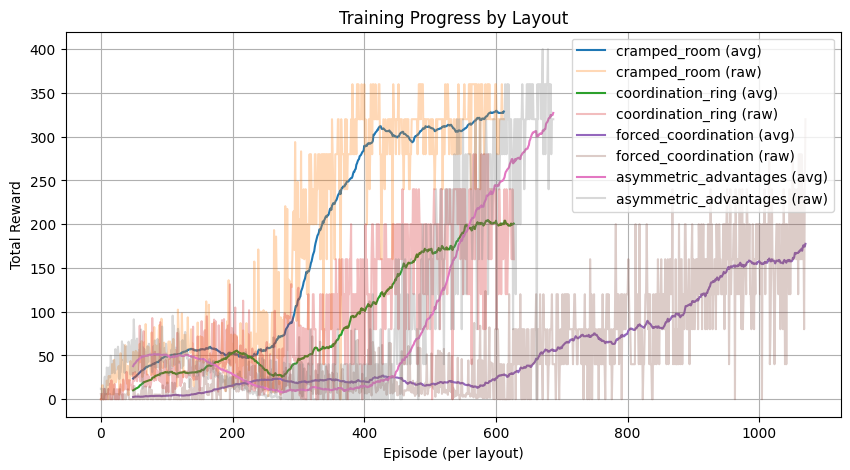

Training completed. Models saved to models\activationrelu_20250823_091958. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 156.00 +/- 14.97
asymmetric_advantages: 158.00 +/- 48.54
forced_coordination: 112.00 +/- 27.13
coordination_ring: 98.00 +/- 22.72


In [47]:
for activation in ["relu"]:
    train_and_evaluate_MAPPO(
        env=multi_env,
        layouts=layouts,
        max_timesteps=TOTAL_TIMESTEPS,
        run_name=f"activation{activation}",
        activation=activation
    )

## Learning rate

Training Progress:  50%|████▉     | 396000/800000 [36:32<38:01, 177.10it/s, Step=396000, AvgR(10)=13.57, pi_loss=0.04, v_loss=0.29]   

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 800000/800000 [1:14:06<00:00, 179.90it/s, Step=8e+5, AvgR(10)=28.00, pi_loss=0.04, v_loss=3.05]   


Models saved to models\learning_rate_lr_p0.0003_lrv_0.0003_20250823_141636


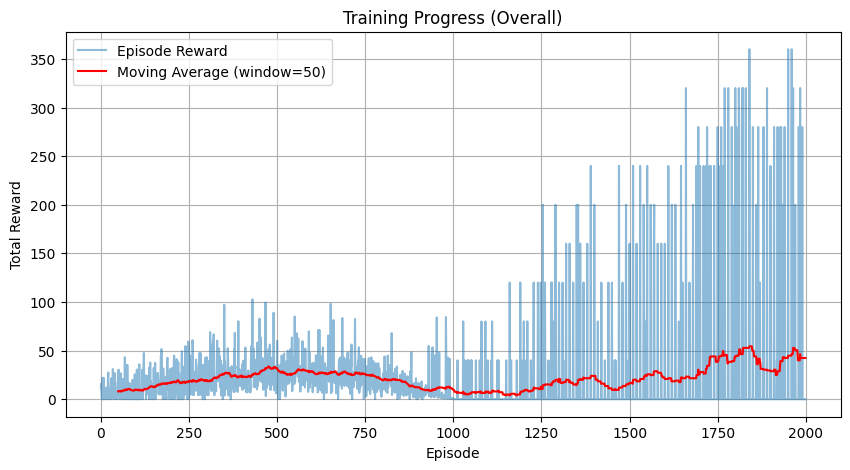

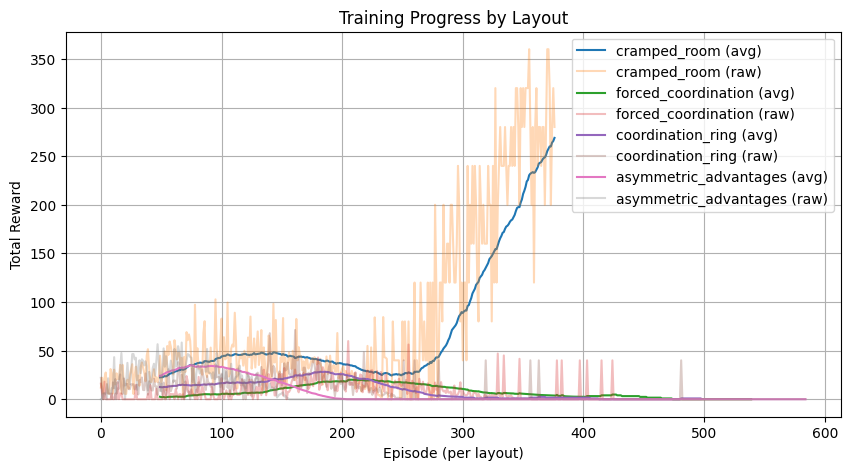

Training completed. Models saved to models\learning_rate_lr_p0.0003_lrv_0.0003_20250823_141636. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 144.00 +/- 29.39
asymmetric_advantages: 0.00 +/- 0.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 0.00 +/- 0.00


Training Progress:  50%|████▉     | 396000/800000 [34:15<36:12, 185.98it/s, Step=396000, AvgR(10)=0.87, pi_loss=0.01, v_loss=0.02]  

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 800000/800000 [1:08:28<00:00, 194.70it/s, Step=8e+5, AvgR(10)=0.00, pi_loss=0.08, v_loss=0.00]   


Models saved to models\learning_rate_lr_p0.0001_lrv_0.0001_20250823_153123


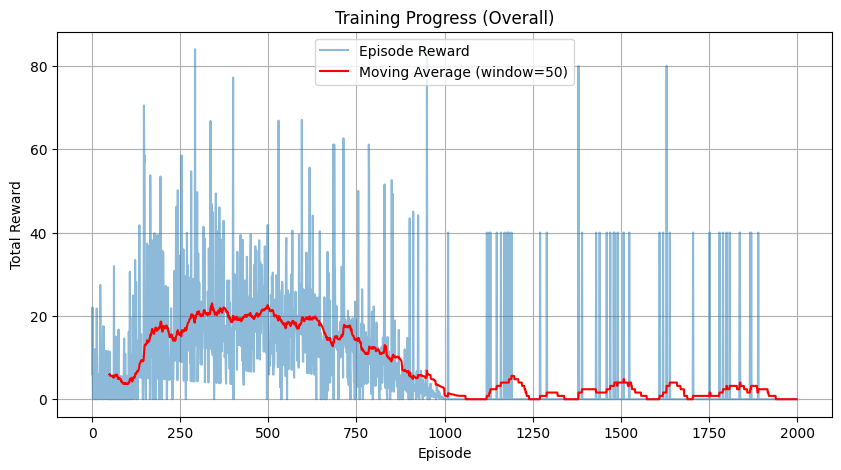

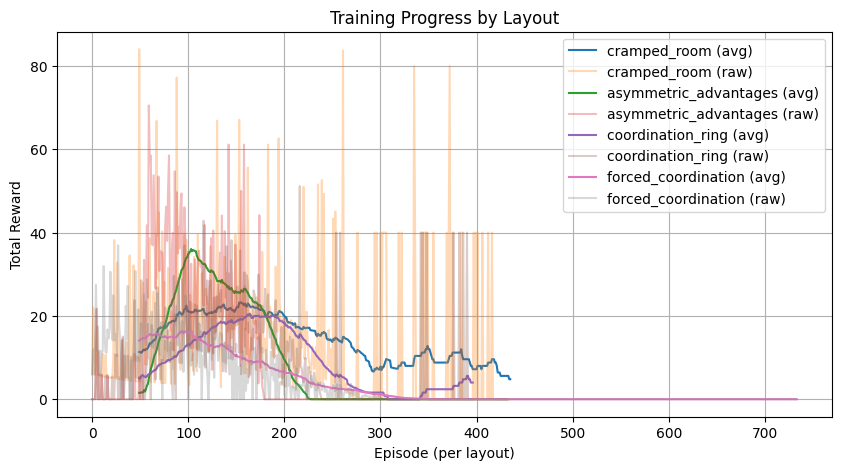

Training completed. Models saved to models\learning_rate_lr_p0.0001_lrv_0.0001_20250823_153123. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 0.00 +/- 0.00
asymmetric_advantages: 0.00 +/- 0.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 4.00 +/- 8.00


Training Progress:  50%|████▉     | 396000/800000 [33:28<33:28, 201.18it/s, Step=396000, AvgR(10)=5.08, pi_loss=-0.01, v_loss=0.16] 

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 800000/800000 [1:06:31<00:00, 200.41it/s, Step=8e+5, AvgR(10)=4.00, pi_loss=-0.04, v_loss=0.05]   


Models saved to models\learning_rate_lr_p0.0001_lrv_0.0003_20250823_164030


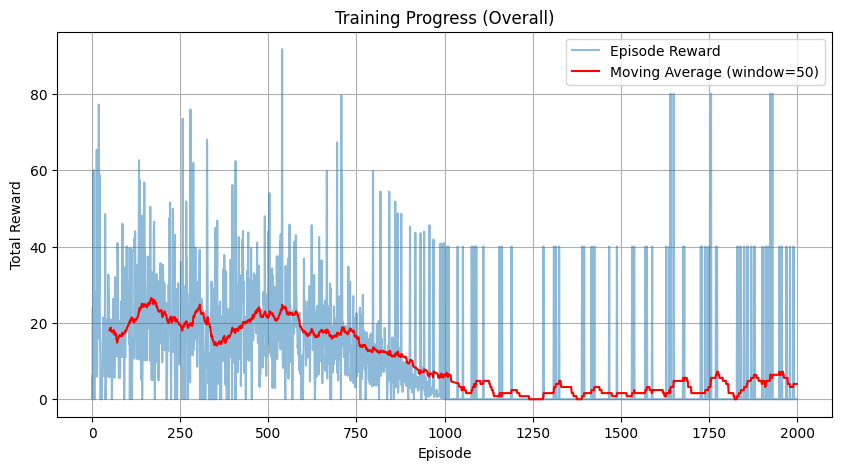

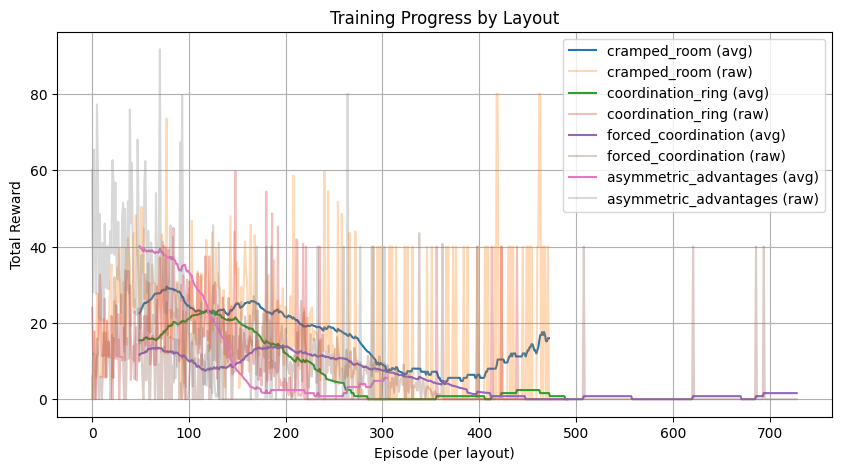

Training completed. Models saved to models\learning_rate_lr_p0.0001_lrv_0.0003_20250823_164030. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 4.00 +/- 8.00
asymmetric_advantages: 0.00 +/- 0.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 2.00 +/- 6.00


Training Progress:  50%|████▉     | 396000/800000 [32:59<33:27, 201.23it/s, Step=396000, AvgR(10)=4.98, pi_loss=-0.15, v_loss=0.46]  

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 800000/800000 [1:06:08<00:00, 201.59it/s, Step=8e+5, AvgR(10)=32.00, pi_loss=-0.08, v_loss=0.67]  


Models saved to models\learning_rate_lr_p0.0003_lrv_0.0001_20250823_174740


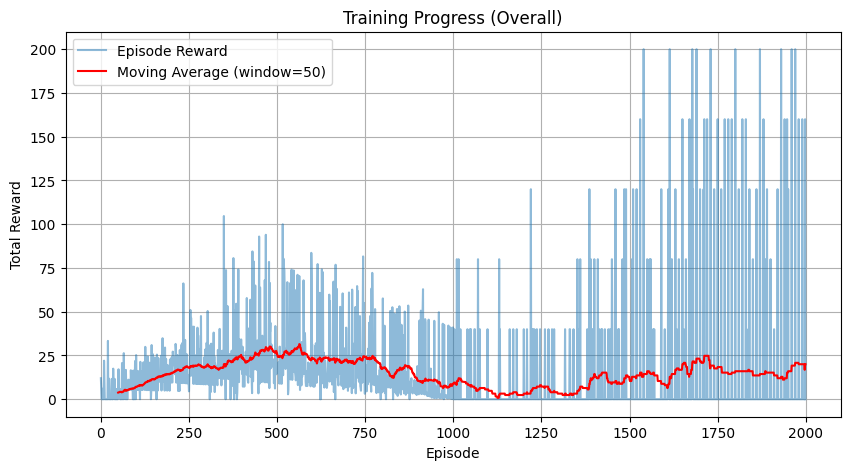

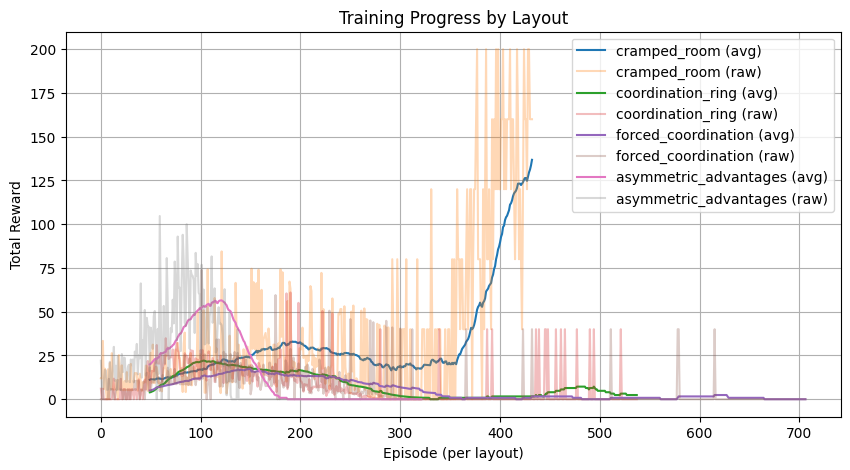

Training completed. Models saved to models\learning_rate_lr_p0.0003_lrv_0.0001_20250823_174740. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 96.00 +/- 32.00
asymmetric_advantages: 0.00 +/- 0.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 0.00 +/- 0.00


Training Progress:  50%|████▉     | 396000/800000 [32:17<32:40, 206.11it/s, Step=396000, AvgR(10)=33.70, pi_loss=-0.05, v_loss=1.07] 

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 800000/800000 [1:05:02<00:00, 204.99it/s, Step=8e+5, AvgR(10)=248.00, pi_loss=0.05, v_loss=29.23]   


Models saved to models\learning_rate_lr_p0.001_lrv_0.0003_20250823_185426


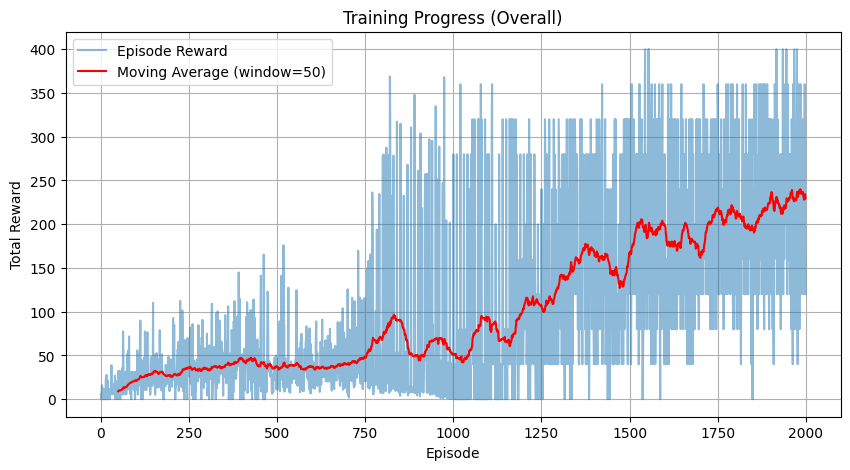

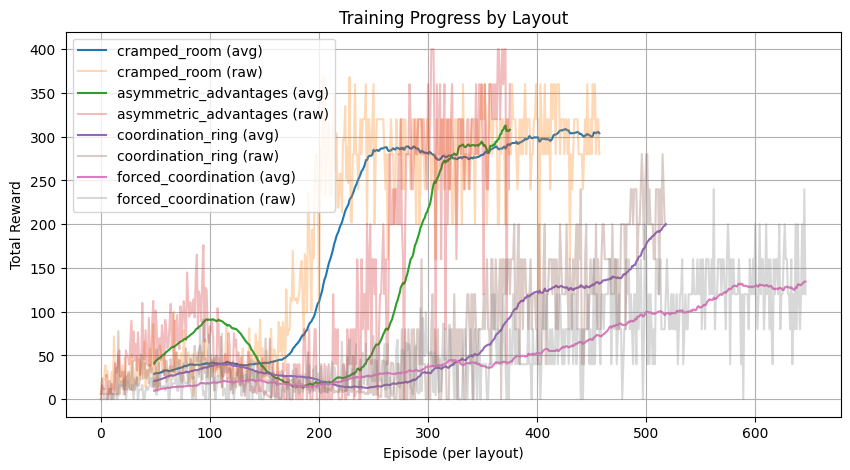

Training completed. Models saved to models\learning_rate_lr_p0.001_lrv_0.0003_20250823_185426. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 142.00 +/- 35.16
asymmetric_advantages: 178.00 +/- 18.87
forced_coordination: 84.00 +/- 19.60
coordination_ring: 86.00 +/- 22.00


In [55]:
TOTAL_TIMESTEPS = 800_000
lr_combinations = [
    (3e-4, 3e-4),    
    (1e-4, 1e-4),
    (1e-4, 3e-4),
    (3e-4, 1e-4),
    (1e-3, 3e-4)
]
for lr_p, lr_v in lr_combinations:
    train_and_evaluate_MAPPO(
        env=multi_env,
        layouts=layouts,
        run_name=f"learning_rate_lr_p{lr_p}_lrv_{lr_v}",
        max_timesteps=TOTAL_TIMESTEPS,
        lr_policy=lr_p, 
        lr_value=lr_v,  
        )

## Test asynched policy and value batch

Training Progress:  50%|████▉     | 596000/1200000 [53:03<53:10, 189.31it/s, Step=596000, AvgR(10)=53.32, pi_loss=-0.02, v_loss=1.87]  

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:46:47<00:00, 187.29it/s, Step=1.2e+6, AvgR(10)=248.00, pi_loss=0.12, v_loss=10.18]  


Models saved to models\indpendent_batches_20250831_232817


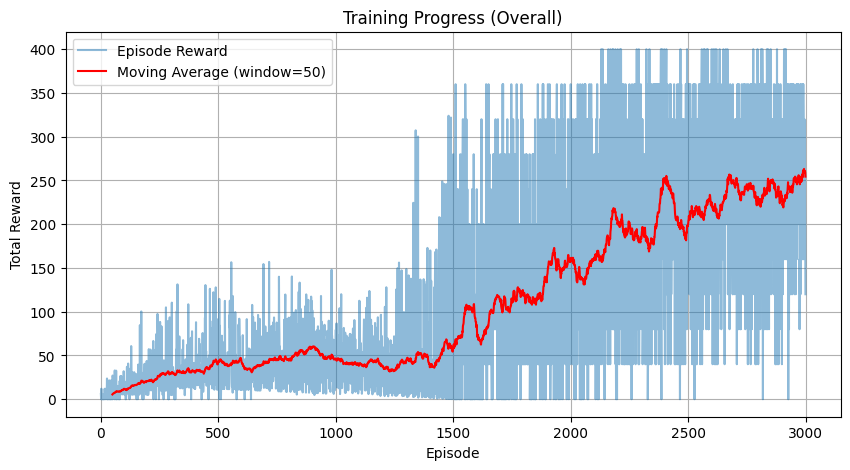

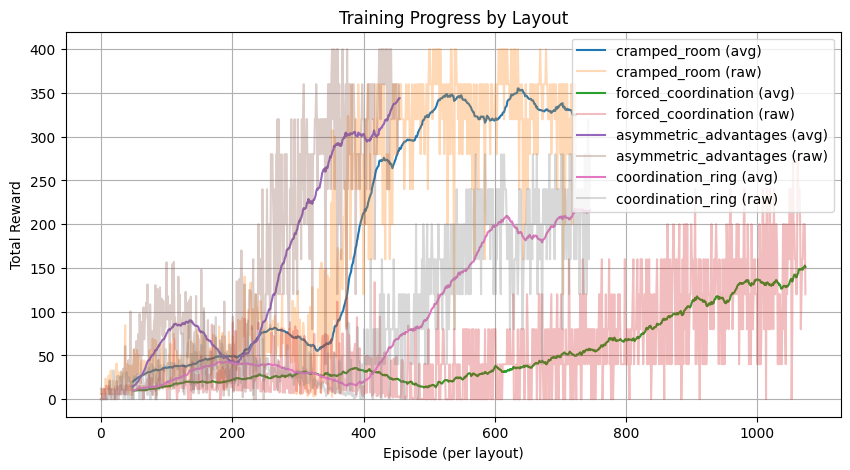

Training completed. Models saved to models\indpendent_batches_20250831_232817. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 170.00 +/- 13.42
asymmetric_advantages: 146.00 +/- 33.53
forced_coordination: 58.00 +/- 34.00
coordination_ring: 122.00 +/- 20.88


In [8]:
train_and_evaluate_MAPPO(
    env=multi_env,
    layouts=layouts,
    run_name=f"indpendent_batches",
    max_timesteps=TOTAL_TIMESTEPS,
    synched=False
    )

## Value coefficient

Training Progress:  50%|████▉     | 596000/1200000 [47:15<46:13, 217.76it/s, Step=596000, AvgR(10)=25.05, pi_loss=0.05, v_loss=0.71]   

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:33:04<00:00, 214.90it/s, Step=1.2e+6, AvgR(10)=24.00, pi_loss=-0.05, v_loss=0.74] 


Models saved to models\value_coef_20250901_011711


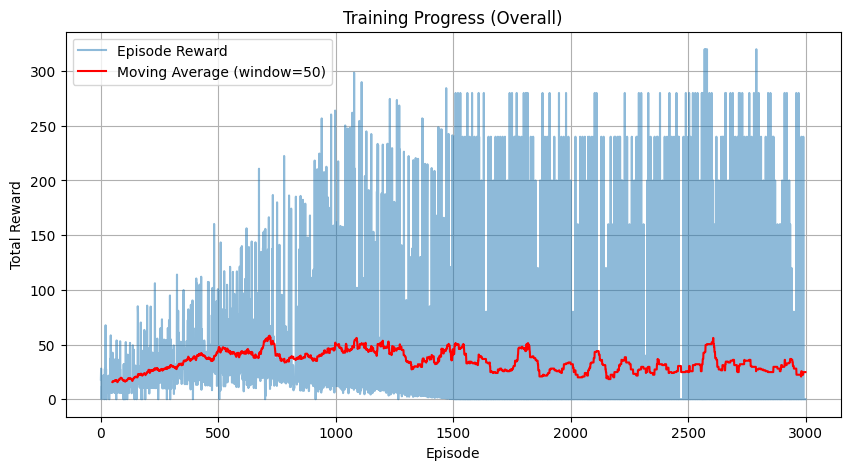

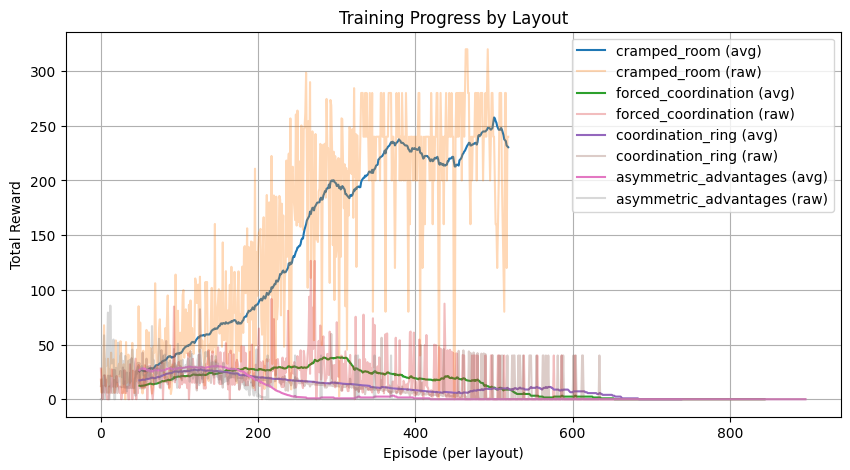

Training completed. Models saved to models\value_coef_20250901_011711. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 130.00 +/- 10.00
asymmetric_advantages: 0.00 +/- 0.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 0.00 +/- 0.00


In [9]:
train_and_evaluate_MAPPO(
    env=multi_env,
    layouts=layouts,
    run_name=f"value_coef",
    max_timesteps=TOTAL_TIMESTEPS,
    synched=True,
    activation="relu",
    value_coef=0.1
    )

## Entropy coefficient

Training Progress:  50%|████▉     | 596000/1200000 [46:32<46:29, 216.54it/s, Step=596000, AvgR(10)=8.20, pi_loss=0.05, v_loss=0.41]    

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 1200000/1200000 [1:32:43<00:00, 215.69it/s, Step=1.2e+6, AvgR(10)=24.00, pi_loss=-0.08, v_loss=2.27] 


Models saved to models\entropy_coef_20250901_025051


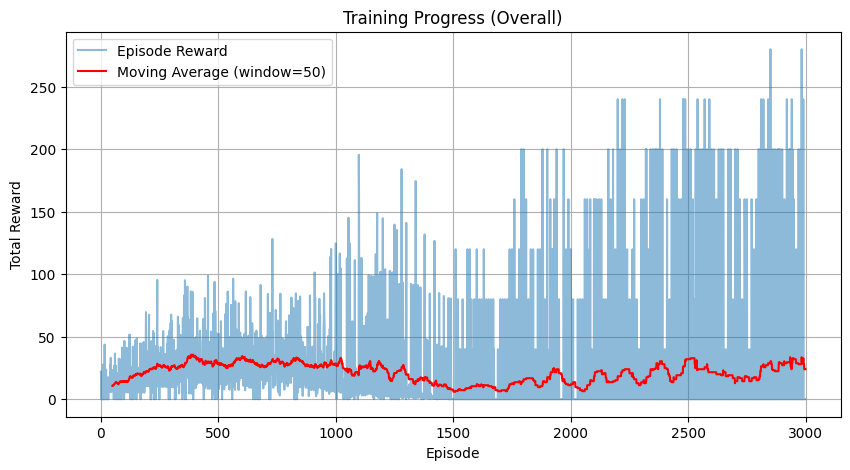

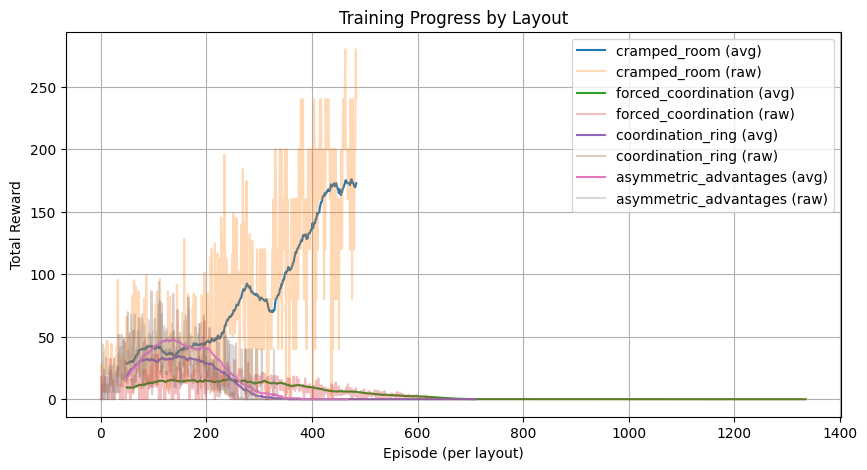

Training completed. Models saved to models\entropy_coef_20250901_025051. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 116.00 +/- 24.98
asymmetric_advantages: 0.00 +/- 0.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 0.00 +/- 0.00


In [10]:
train_and_evaluate_MAPPO(
    env=multi_env,
    layouts=layouts,
    run_name=f"entropy_coef",
    max_timesteps=TOTAL_TIMESTEPS,
    synched=True,
    activation="relu",
    entropy_coef=0.05
    )

## Combine everything 2 millions run

Training Progress: 100%|█████████▉| 1996000/2000000 [2:38:15<00:18, 211.79it/s, Step=2e+6, AvgR(10)=325.14, pi_loss=-0.16, v_loss=10.64]     

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 2000000/2000000 [2:38:21<00:00, 210.49it/s, Step=2e+6, AvgR(10)=328.58, pi_loss=-0.02, v_loss=33.50]


Models saved to models\2mill_run_20250823_200006


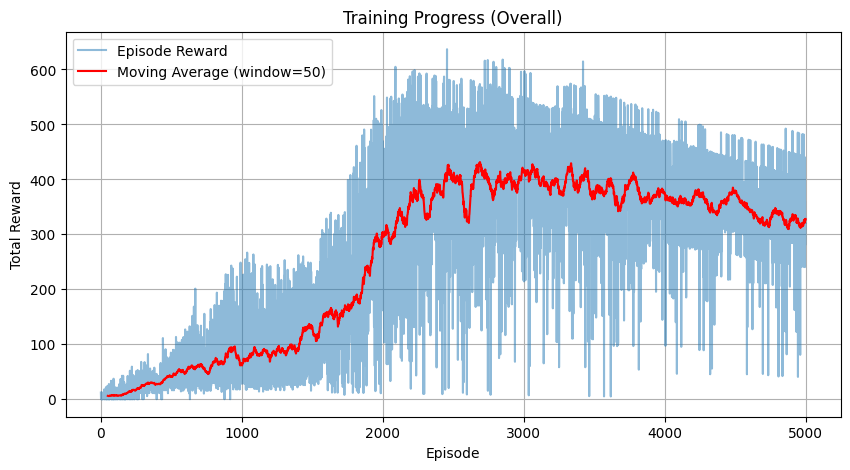

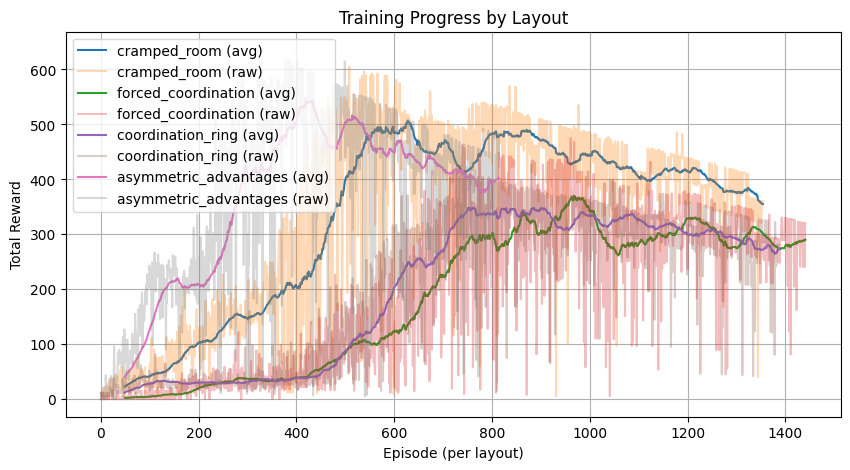

Training completed. Models saved to models\2mill_run_20250823_200006. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 164.00 +/- 28.00
asymmetric_advantages: 214.00 +/- 29.73
forced_coordination: 150.00 +/- 13.42
coordination_ring: 128.00 +/- 24.00


In [56]:
train_and_evaluate_MAPPO(
    env=multi_env,
    layouts=layouts,
    run_name=f"2mill_run",
    max_timesteps=2_000_000,
    clip_ratio=0.3, 
    activation="relu",
    decay_until="full_run"
    )

## Generalization test

Training Progress:  50%|████▉     | 396000/800000 [32:40<32:30, 207.09it/s, Step=396000, AvgR(10)=203.62, pi_loss=0.01, v_loss=22.33] 

Shaping coefficient reached 0. Stopping shaping rewards.


Training Progress: 100%|██████████| 800000/800000 [1:05:24<00:00, 203.86it/s, Step=8e+5, AvgR(10)=360.00, pi_loss=-0.06, v_loss=24.51]  


Models saved to models\generalization_test_20250823_124316


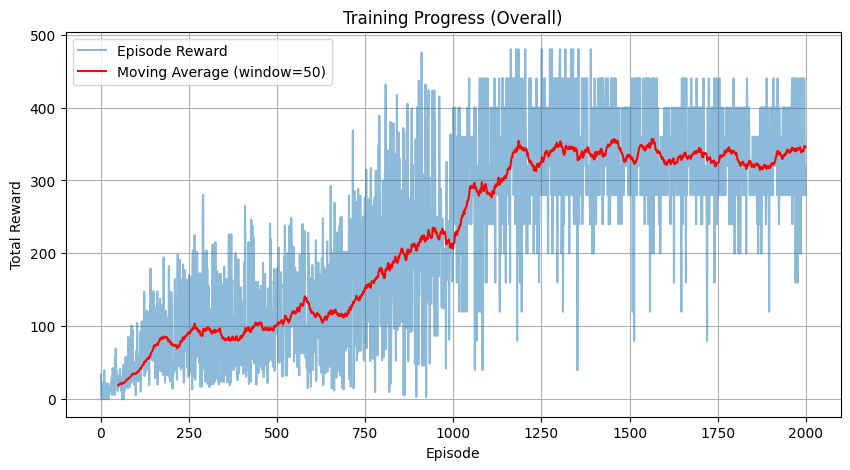

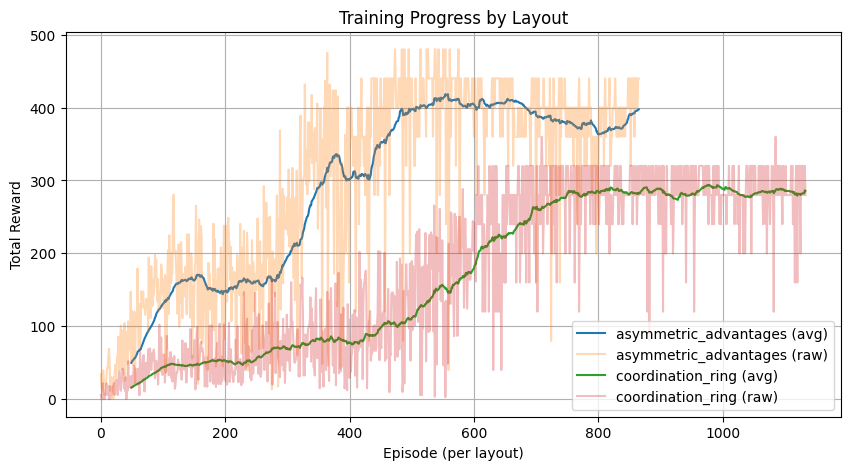

Training completed. Models saved to models\generalization_test_20250823_124316. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 0.00 +/- 0.00
asymmetric_advantages: 206.00 +/- 9.17
forced_coordination: 0.00 +/- 0.00
coordination_ring: 136.00 +/- 35.55


In [49]:
TOTAL_TIMESTEPS = 800_000

multi_env = GeneralizedOvercooked(layouts=["asymmetric_advantages", "coordination_ring"])
layouts = ["cramped_room", "asymmetric_advantages", "forced_coordination", "coordination_ring"]
#"coordination_ring"

train_and_evaluate_MAPPO(
    env=multi_env,
    layouts=layouts,
    run_name=f"generalization_test",
    max_timesteps=TOTAL_TIMESTEPS,
    decay_until="half_run",
    activation="relu",
    clip_ratio=0.3
    )

Training Progress: 100%|██████████| 1200000/1200000 [1:35:49<00:00, 208.72it/s, Step=1.2e+6, AvgR(10)=308.91, pi_loss=0.16, v_loss=53.17]  


Models saved to models\generalization_test_asynched_20250825_142154


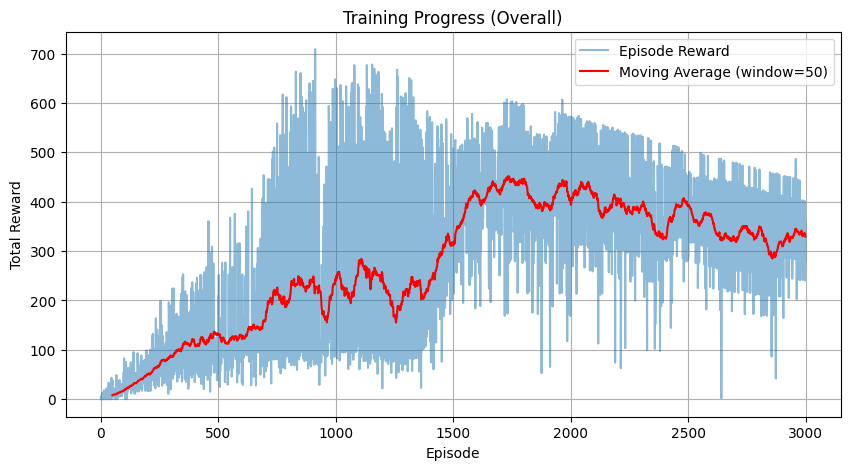

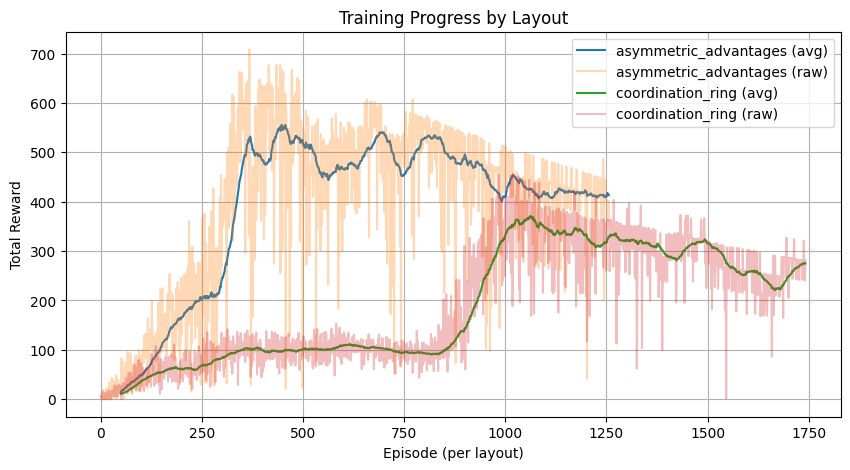

Training completed. Models saved to models\generalization_test_asynched_20250825_142154. Starting evaluation...

--- Final Evaluation Summary ---
cramped_room: 0.00 +/- 0.00
asymmetric_advantages: 202.00 +/- 6.00
forced_coordination: 0.00 +/- 0.00
coordination_ring: 130.00 +/- 10.00


In [13]:
TOTAL_TIMESTEPS = 1_200_000

multi_env = GeneralizedOvercooked(layouts=["asymmetric_advantages", "coordination_ring"])
layouts = ["cramped_room", "asymmetric_advantages", "forced_coordination", "coordination_ring"]
#"coordination_ring"

train_and_evaluate_MAPPO(
    env=multi_env,
    layouts=layouts,
    run_name=f"generalization_test_asynched",
    max_timesteps=TOTAL_TIMESTEPS,
    decay_until="full_run",
    activation="relu",
    clip_ratio=0.3,
    synched=False
    )